# Project 2020

These are my solutions to the Project for the module Machine Learning and Statistics at GMIT. The author is Alexandra Macuga (G00376287@gmit.ie).

This is a Jupyter notebook that trains a model using the dataset. In the notebook I will explain my model and give an analysis of its accuracy.

## Dataset

Import the required modules and have a look at the dataset.

In [1]:
# Numerical arrays.
import numpy as np

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Machine Learning- split dataset
from sklearn.model_selection import train_test_split

# Plotting.
import matplotlib.pyplot as plt

# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Neural networks.
import tensorflow.keras as kr

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
# Data set.
df = pd.read_csv("powerproduction.csv")
# Numpy array
data = df.values

In [4]:
# Preview the first 10 lines of the loaded data 
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [5]:
# Statistics
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


We have two columns in the dataset- *speed* and *power*. There is 500 values in both columns. The column *speed* has values between 0 to 25, and the column *power* has values between 0 to 113.556. 

## Plot the dataset

<AxesSubplot:xlabel='speed', ylabel='power'>

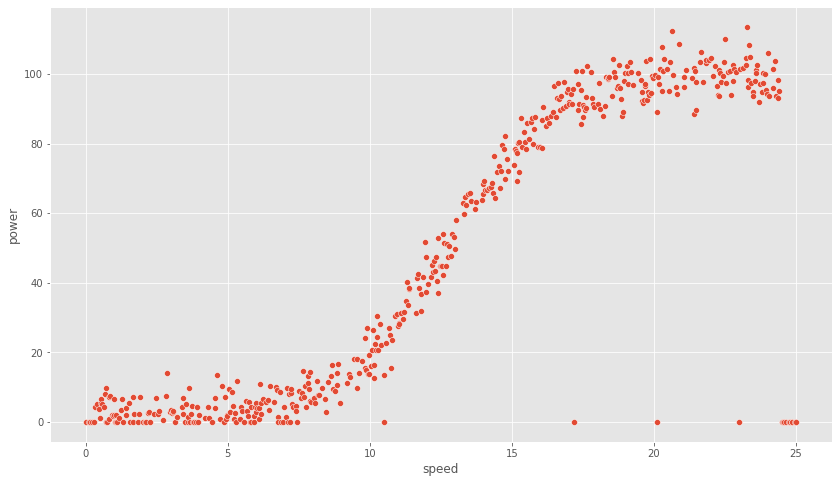

In [6]:
# plot using seaborn scatterplot
sns.scatterplot(x = "speed", y = "power", data = df)

Based on the plot, it looks like there is a linear relatioship between speed and power. The higher the wind, the higher the power. However, in some observations where the speed is over 10, the power is 0. This can have a lot of reasons like recording errors, failures, maintenance etc. As outliers can skew statistical measures and data distributions, we should remove them from dataset.

In [7]:
# Count how many observations have power = 0 and speed > 10 (outliers)
df[(df.power == 0) & (df.speed >= 10)].count()

speed    14
power    14
dtype: int64

In [8]:
# Remove outliers from dataset
df = df.drop(df.loc[(df.power == 0) & (df.speed >= 10)].index)
df.count()

speed    486
power    486
dtype: int64

In [9]:
df.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000


I decided to remove 14 observations from the dataset. The observations are outliers, where the speed was higher than 10 and the power was 0. There is 486 observations in the dataset now. The column speed has values between 0 to 24.399, and the column power has values between 0 to 113.556.

In [10]:
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(486, 1) (486,)
(388, 1) (98, 1) (388,) (98,)


Split the dataset into train set and test set. There is 388 observations in the train dataset and 98 observations in the test dataset. 

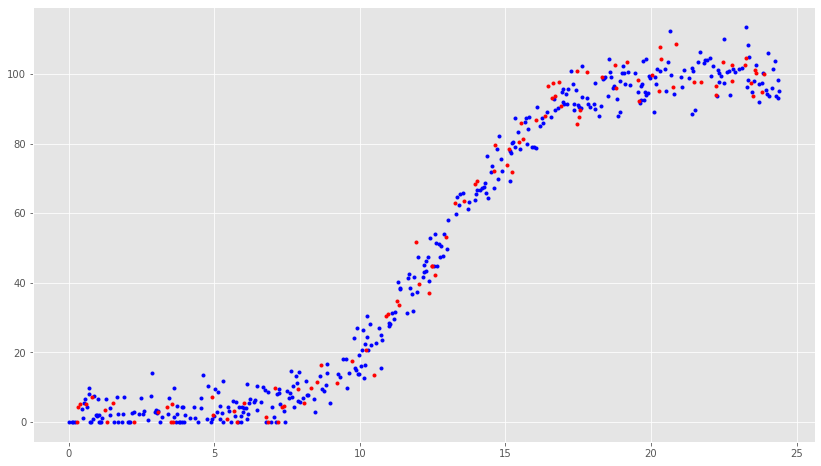

In [11]:
# Plot the train and test dataset
# train set- blue color
plt.plot(X_train, y_train, '.b')
#test set-red color
plt.plot(X_test, y_test, '.r')

## Statsmodels

**Statsmodels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.[1]

In [12]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(data)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.812e+33
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:21:19   Log-Likelihood:                 14777.
No. Observations:                 486   AIC:                        -2.955e+04
Df Residuals:                     483   BIC:                        -2.954e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.809e-14    1.7e-15    -16.478      0.0

## Regression in keras

### Linear regression


To find the relationship between speed and power, we can use regression. That relatioship is then used to predict future events. *Linear regression* uses the relationship between the data-points to draw a straight line through all them. This line can be used to predict future values.[2]

In [13]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [14]:
# Train the neural network on our training data.
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 1ms/step - loss: 2417.9797
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 2622.5737
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 2275.8621
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 2518.5293
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 2396.0796
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 2509.6708
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 2369.9249
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 2261.7103
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 2417.7300
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 2430.9105
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 2290.9682
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 2043.2607
E

13/13 [==============================] - 0s 2ms/step - loss: 1176.5637
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 1188.6510
Epoch 100/500
13/13 [==============================] - 0s 2ms/step - loss: 1171.2573
Epoch 101/500
13/13 [==============================] - 0s 2ms/step - loss: 1096.1440
Epoch 102/500
13/13 [==============================] - 0s 2ms/step - loss: 1150.5715
Epoch 103/500
13/13 [==============================] - 0s 2ms/step - loss: 1104.6817
Epoch 104/500
13/13 [==============================] - 0s 1ms/step - loss: 1140.0905
Epoch 105/500
13/13 [==============================] - 0s 2ms/step - loss: 1134.7146
Epoch 106/500
13/13 [==============================] - 0s 2ms/step - loss: 1077.9825
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 1160.4187
Epoch 108/500
13/13 [==============================] - 0s 2ms/step - loss: 1119.6029
Epoch 109/500
13/13 [==============================] - 0s 2ms/step - loss: 1091.

13/13 [==============================] - 0s 1ms/step - loss: 565.3080
Epoch 196/500
13/13 [==============================] - 0s 1ms/step - loss: 609.3692
Epoch 197/500
13/13 [==============================] - 0s 1ms/step - loss: 557.0559
Epoch 198/500
13/13 [==============================] - 0s 1ms/step - loss: 549.2869
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 563.6868
Epoch 200/500
13/13 [==============================] - 0s 1ms/step - loss: 518.9024
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 553.0115
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 553.4603
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 507.1017
Epoch 204/500
13/13 [==============================] - 0s 3ms/step - loss: 512.4461
Epoch 205/500
13/13 [==============================] - 0s 2ms/step - loss: 537.0910
Epoch 206/500
13/13 [==============================] - 0s 2ms/step - loss: 511.6313
Epoch 

13/13 [==============================] - 0s 1ms/step - loss: 313.6932
Epoch 292/500
13/13 [==============================] - 0s 1ms/step - loss: 315.2494
Epoch 293/500
13/13 [==============================] - 0s 1ms/step - loss: 323.2356
Epoch 294/500
13/13 [==============================] - 0s 1ms/step - loss: 313.6981
Epoch 295/500
13/13 [==============================] - 0s 2ms/step - loss: 324.9304
Epoch 296/500
13/13 [==============================] - 0s 2ms/step - loss: 328.7243
Epoch 297/500
13/13 [==============================] - 0s 3ms/step - loss: 326.7565
Epoch 298/500
13/13 [==============================] - 0s 1ms/step - loss: 333.1050
Epoch 299/500
13/13 [==============================] - 0s 2ms/step - loss: 324.4338
Epoch 300/500
13/13 [==============================] - ETA: 0s - loss: 278.016 - 0s 3ms/step - loss: 319.6262
Epoch 301/500
13/13 [==============================] - 0s 2ms/step - loss: 326.5216
Epoch 302/500
13/13 [==============================] - 0s 1ms/st

13/13 [==============================] - 0s 1ms/step - loss: 285.5091
Epoch 388/500
13/13 [==============================] - 0s 1ms/step - loss: 274.4976
Epoch 389/500
13/13 [==============================] - 0s 2ms/step - loss: 292.3738
Epoch 390/500
13/13 [==============================] - 0s 1ms/step - loss: 280.7857
Epoch 391/500
13/13 [==============================] - 0s 1ms/step - loss: 282.3407
Epoch 392/500
13/13 [==============================] - 0s 1ms/step - loss: 279.3073
Epoch 393/500
13/13 [==============================] - 0s 1ms/step - loss: 288.0966
Epoch 394/500
13/13 [==============================] - 0s 2ms/step - loss: 272.1918
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 273.3281
Epoch 396/500
13/13 [==============================] - 0s 2ms/step - loss: 280.0655
Epoch 397/500
13/13 [==============================] - 0s 1ms/step - loss: 271.2072
Epoch 398/500
13/13 [==============================] - 0s 2ms/step - loss: 286.8525
Epoch 

13/13 [==============================] - 0s 1ms/step - loss: 267.7267
Epoch 484/500
13/13 [==============================] - 0s 1ms/step - loss: 256.3090
Epoch 485/500
13/13 [==============================] - 0s 1ms/step - loss: 254.4011
Epoch 486/500
13/13 [==============================] - 0s 1ms/step - loss: 245.8070
Epoch 487/500
13/13 [==============================] - 0s 1ms/step - loss: 263.5437
Epoch 488/500
13/13 [==============================] - 0s 2ms/step - loss: 258.8683
Epoch 489/500
13/13 [==============================] - 0s 1ms/step - loss: 256.8713
Epoch 490/500
13/13 [==============================] - 0s 1ms/step - loss: 280.3945
Epoch 491/500
13/13 [==============================] - 0s 667us/step - loss: 259.5630
Epoch 492/500
13/13 [==============================] - 0s 1ms/step - loss: 267.5305
Epoch 493/500
13/13 [==============================] - 0s 2ms/step - loss: 256.9480
Epoch 494/500
13/13 [==============================] - 0s 1ms/step - loss: 260.7729
Epoc

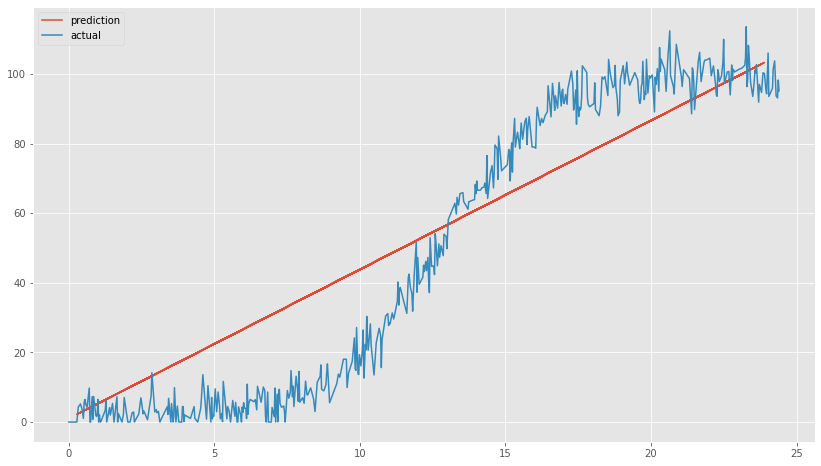

In [15]:
# Let's plot our predictions of the x values we trained on
plt.plot(X_test, model.predict(X_test), label='prediction') 
plt.plot(X, y, label = 'actual')
plt.legend()

In [16]:
# Evaluate the neural network on the test data.
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 274.6797


274.6797180175781

The plot and the evaluation are both showing that this dataset is a bad fit for linear regression.

### Polynomial

In [17]:
# Train a model with sigmoid activation function and linear activation function.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [18]:
# Train the neural network on our training data.
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 2ms/step - loss: 4046.0470
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 3789.7061
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 3975.1536
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 3660.8008
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 3951.5793
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 3883.7785
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 3614.0231
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 3841.1665
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 3428.6073
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 3377.0153
Epoch 11/500
13/13 [==============================] - 0s 2ms/step - loss: 3276.2322
Epoch 12/500
13/13 [==============================] - 0s 2ms/step - loss: 3575.4726
E

13/13 [==============================] - 0s 1ms/step - loss: 1320.9182
Epoch 99/500
13/13 [==============================] - 0s 1ms/step - loss: 1325.6094
Epoch 100/500
13/13 [==============================] - 0s 1ms/step - loss: 1200.0901
Epoch 101/500
13/13 [==============================] - 0s 667us/step - loss: 1209.8212
Epoch 102/500
13/13 [==============================] - 0s 1ms/step - loss: 1205.3330
Epoch 103/500
13/13 [==============================] - 0s 1ms/step - loss: 1316.2435
Epoch 104/500
13/13 [==============================] - 0s 1ms/step - loss: 1190.2898
Epoch 105/500
13/13 [==============================] - 0s 1ms/step - loss: 1261.9712
Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 1206.1528
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 1264.7556
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 1171.4630
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 114

Epoch 195/500
13/13 [==============================] - 0s 1ms/step - loss: 430.2623
Epoch 196/500
13/13 [==============================] - 0s 1ms/step - loss: 461.2946
Epoch 197/500
13/13 [==============================] - 0s 1ms/step - loss: 428.8995
Epoch 198/500
13/13 [==============================] - 0s 2ms/step - loss: 419.8882
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 422.1441
Epoch 200/500
13/13 [==============================] - 0s 1ms/step - loss: 464.0948
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 405.4968
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 424.5511
Epoch 203/500
13/13 [==============================] - 0s 667us/step - loss: 421.3346
Epoch 204/500
13/13 [==============================] - 0s 2ms/step - loss: 413.2021
Epoch 205/500
13/13 [==============================] - 0s 2ms/step - loss: 409.2753
Epoch 206/500
13/13 [==============================] - 0s 2ms/step - loss:

13/13 [==============================] - 0s 1ms/step - loss: 149.1984
Epoch 293/500
13/13 [==============================] - 0s 1ms/step - loss: 135.0356
Epoch 294/500
13/13 [==============================] - 0s 1ms/step - loss: 149.5570
Epoch 295/500
13/13 [==============================] - 0s 2ms/step - loss: 147.8333
Epoch 296/500
13/13 [==============================] - 0s 1ms/step - loss: 141.2459
Epoch 297/500
13/13 [==============================] - 0s 1ms/step - loss: 144.3606
Epoch 298/500
13/13 [==============================] - 0s 1ms/step - loss: 142.2729
Epoch 299/500
13/13 [==============================] - 0s 1ms/step - loss: 133.6480
Epoch 300/500
13/13 [==============================] - 0s 1ms/step - loss: 132.3568
Epoch 301/500
13/13 [==============================] - 0s 1ms/step - loss: 132.0157
Epoch 302/500
13/13 [==============================] - 0s 1ms/step - loss: 141.2988
Epoch 303/500
13/13 [==============================] - 0s 1ms/step - loss: 123.5508
Epoch 

13/13 [==============================] - 0s 1ms/step - loss: 66.0258
Epoch 391/500
13/13 [==============================] - 0s 1ms/step - loss: 64.1678
Epoch 392/500
13/13 [==============================] - 0s 1ms/step - loss: 70.0216
Epoch 393/500
13/13 [==============================] - ETA: 0s - loss: 39.78 - 0s 1ms/step - loss: 60.9726
Epoch 394/500
13/13 [==============================] - 0s 1ms/step - loss: 62.9549
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 58.8696
Epoch 396/500
13/13 [==============================] - 0s 2ms/step - loss: 60.9585
Epoch 397/500
13/13 [==============================] - 0s 1ms/step - loss: 60.8451
Epoch 398/500
13/13 [==============================] - 0s 1ms/step - loss: 62.2819
Epoch 399/500
13/13 [==============================] - 0s 1ms/step - loss: 61.3026
Epoch 400/500
13/13 [==============================] - 0s 1ms/step - loss: 67.1047
Epoch 401/500
13/13 [==============================] - 0s 1ms/step - loss: 62

13/13 [==============================] - 0s 1ms/step - loss: 39.7905
Epoch 488/500
13/13 [==============================] - 0s 2ms/step - loss: 41.6723
Epoch 489/500
13/13 [==============================] - 0s 1ms/step - loss: 39.1513
Epoch 490/500
13/13 [==============================] - 0s 2ms/step - loss: 38.3774
Epoch 491/500
13/13 [==============================] - 0s 666us/step - loss: 40.6084
Epoch 492/500
13/13 [==============================] - 0s 1ms/step - loss: 39.7233
Epoch 493/500
13/13 [==============================] - 0s 1ms/step - loss: 37.6022
Epoch 494/500
13/13 [==============================] - 0s 1ms/step - loss: 40.0114
Epoch 495/500
13/13 [==============================] - 0s 1ms/step - loss: 36.5339
Epoch 496/500
13/13 [==============================] - 0s 1ms/step - loss: 37.4233
Epoch 497/500
13/13 [==============================] - 0s 1ms/step - loss: 40.5632
Epoch 498/500
13/13 [==============================] - 0s 1ms/step - loss: 41.4139
Epoch 499/500
13

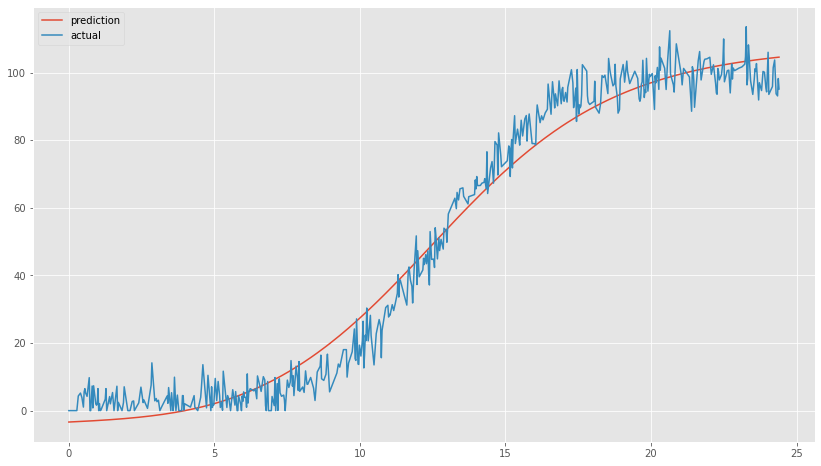

In [19]:
# Plot the predictions (on the training set itself).
plt.plot(X, model.predict(X), label='prediction')
plt.plot(X, y, label='actual')
plt.legend()

In [20]:
model.predict([15.0])

array([[70.9762]], dtype=float32)

In [21]:
# Evaluate the neural network on the test data.
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 48.4524


48.452430725097656

This model is much better than the previous one. The loss is lower than when using only linear regression. 

## References

[1] https://www.statsmodels.org/stable/index.html

[2] https://www.w3schools.com/python/python_ml_linear_regression.asp